In [2]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filename='cristatus/15519.mp3'

In [4]:
!pip install librosa

  Using cached librosa-0.10.0-py3-none-any.whl (252 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
  Using cached lazy_loader-0.1-py3-none-any.whl (8.6 kB)
  Using cached soxr-0.3.4-cp39-cp39-win_amd64.whl (184 kB)
  Using cached audioread-3.0.0-py3-none-any.whl
  Using cached pooch-1.7.0-py3-none-any.whl (60 kB)



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd

import os
import numpy as np
import scipy as sp

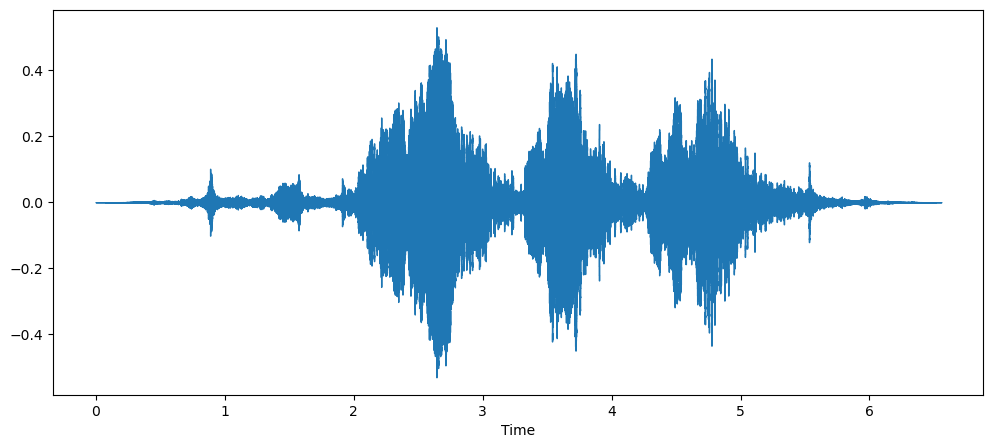

In [7]:
plt.figure(figsize=(12,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [8]:
sample_duration=1/sample_rate
print(sample_duration)

4.5351473922902495e-05


In [9]:
ft=sp.fft.fft(data)
magnitude=np.absolute(ft)
frequency=np.linspace(0,sample_rate,len(magnitude))

In [10]:
len(magnitude)

144576

<function matplotlib.pyplot.show(close=None, block=None)>

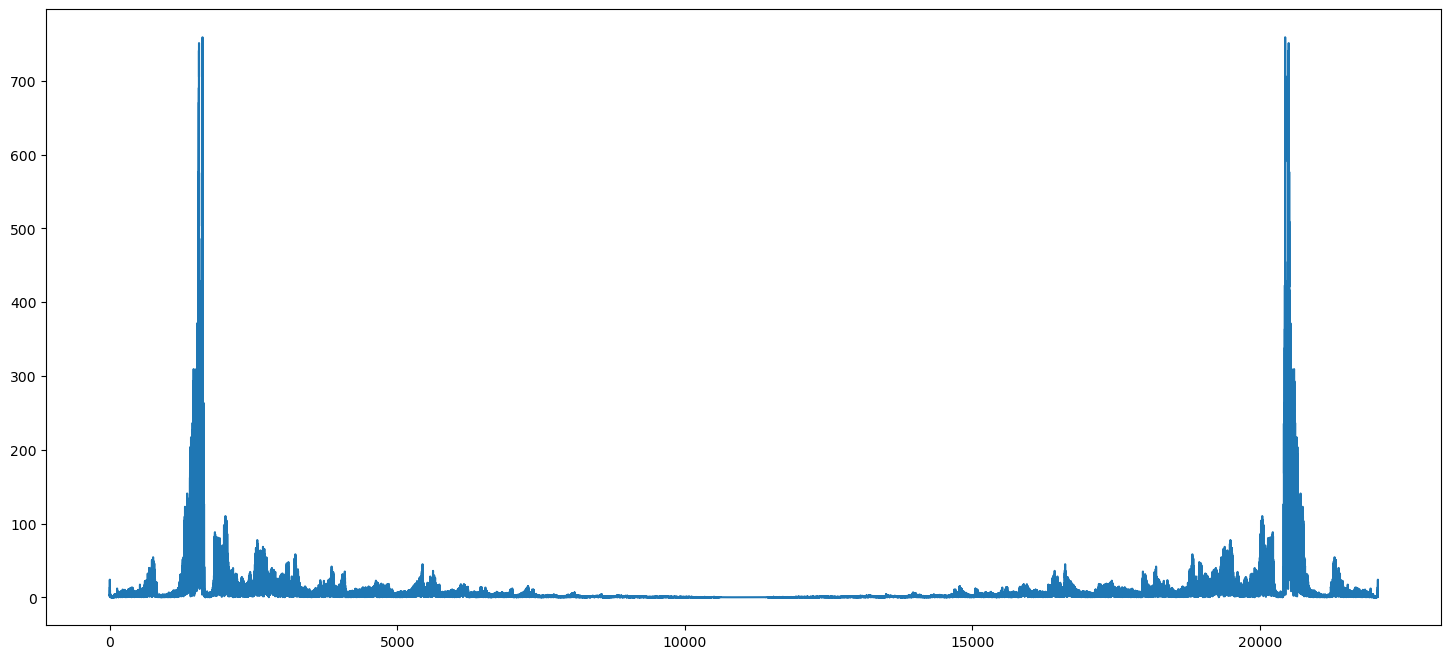

In [11]:
plt.figure(figsize=(18,8))
plt.plot(frequency[0:150000],magnitude[0:150000])
plt.show

In audio production, a sample rate (or "sampling rate") defines how many times per second a sound is sampled. 

If you use scipy to read audio file then the original sample rate would be shown which would be different for different files. using librosa it normalizes the sample rate to 22050 for all audio files

There are many channels in audio such as mono and stereo but with help of librosa you convert it into monochannel 

In [12]:
print(sample_rate)

22050


In [4]:
metadata=pd.read_csv("BirdRecordingIndia_final.csv")

Data is not imbalanced 


In [5]:
metadata['sp'].value_counts()

sonneratii       63
pondicerianus    48
torqueola        33
cristatus        31
spadicea         29
impejanus        27
Name: sp, dtype: int64

**Data Preprocessing**

In [6]:
metadata

Unnamed: 0  Unnamed: 0.1      id          gen             sp  \
0            56            56  706170  Francolinus  pondicerianus   
1            57            57  667224  Francolinus  pondicerianus   
2            58            58  667223  Francolinus  pondicerianus   
3            59            59  611583  Francolinus  pondicerianus   
4            60            60  611581  Francolinus  pondicerianus   
..          ...           ...     ...          ...            ...   
226         495           495  426341         Pavo      cristatus   
227         496           496  406117         Pavo      cristatus   
228         497           497  369407         Pavo      cristatus   
229         498           498  369406         Pavo      cristatus   
230         499           499  215374         Pavo      cristatus   

              ssp  group              en               rec    cnt  ...  \
0    interpositus  birds  Grey Francolin   Kousheyo Bagchi  India  ...   
1             NaN  birds  Grey Francolin  Jelle Scharringa  India  ...   
2             NaN  birds  Grey Francolin  Jelle Scharringa  India  ...   
3             NaN  birds  Grey Francolin  Jelle Scharringa  India  ...   
4             NaN  birds  Grey Francolin  Jelle Scharringa  India  ...   
..            ...    ...             ...               ...    ...  ...   
226           NaN  birds  Indian Peafowl       ARUN PRABHU  India  ...   
227           NaN  birds  Indian Peafowl          Dilip KG  India  ...   
228           NaN  birds  Indian Peafowl     Peter Boesman  India  ...   
229           NaN  birds  Indian Peafowl     Peter Boesman  India  ...   
230           NaN  birds  Indian Peafowl    Pankaj Koparde  India  ...   

                                                   rmk  bird-seen  \
0    Dry vegetations around R. Damodar. Eastern edg...    unknown   
1    Several birds on ground calling from many dire...        yes   
2    Several birds on ground calling from different...        yes   
3                                    Banni Grasslands.        yes   
4                         Edge of Moti Virani village.        yes   
..                                                 ...        ...   
226                                                NaN        yes   
227                                                NaN        yes   
228                                                NaN    unknown   
229                                                NaN    unknown   
230                                                NaN        yes   

     animal-seen playback-used temp regnr auto  dvc  mic    smp  
0        unknown       unknown  NaN   NaN   no  NaN  NaN  44100  
1            yes            no  NaN   NaN   no  NaN  NaN  44100  
2            yes            no  NaN   NaN   no  NaN  NaN  44100  
3            yes            no  NaN   NaN   no  NaN  NaN  44100  
4            yes            no  NaN   NaN   no  NaN  NaN  44100  
..           ...           ...  ...   ...  ...  ...  ...    ...  
226          yes       unknown  NaN   NaN   no  NaN  NaN  44100  
227          yes            no  NaN   NaN   no  NaN  NaN  44100  
228      unknown       unknown  NaN   NaN   no  NaN  NaN  44100  
229      unknown       unknown  NaN   NaN   no  NaN  NaN  44100  
230          yes            no  NaN   NaN   no  NaN  NaN  44100  

[231 rows x 40 columns]

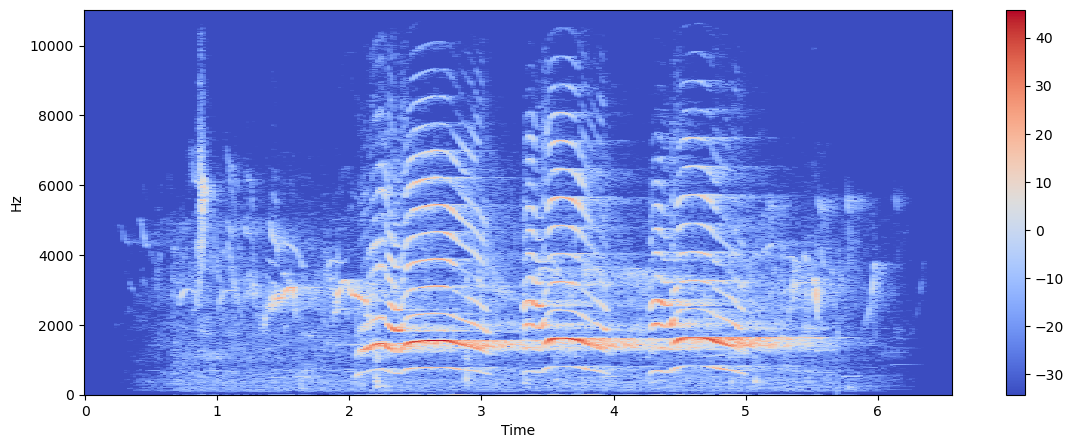

In [17]:
#display Spectrogram
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

MFCC - READ ABOUT THE TOPIC

In [18]:
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=30)

In [19]:
print(mfccs.shape)

(30, 283)


In [20]:
mfccs

array([[-561.3987, -561.3987, -561.3987, ..., -561.3987, -561.3987,
        -561.3987],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

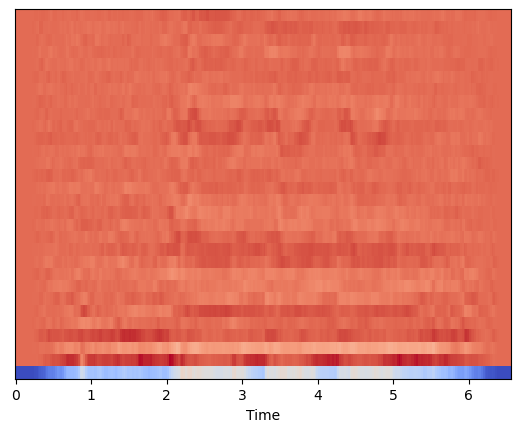

In [21]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [7]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features
    

In [26]:
!pip install resampy


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
path = 'Dataset/cristatus'
extracted_features=[]
for filename in os.listdir(path):
    if filename.endswith('.mp3'):
        filepath = os.path.join(path, filename)
#         print(filepath)
        final_class_labels=folder ='cristatus'
        data=features_extractor(filepath)
        extracted_features.append([data,final_class_labels])

In [10]:
path = 'Dataset/impejanus'
extracted_features_1=[]
for filename in os.listdir(path):
    if filename.endswith('.mp3'):
        filepath = os.path.join(path, filename)
        final_class_labels=folder ='impejanus'
        data=features_extractor(filepath)
        extracted_features_1.append([data,final_class_labels])

In [11]:
path = 'Dataset/pondicerianus'
extracted_features_2=[]
for filename in os.listdir(path):
    if filename.endswith('.mp3'):
        filepath = os.path.join(path, filename)
        final_class_labels=folder ='pondicerianus'
        data=features_extractor(filepath)
        extracted_features_2.append([data,final_class_labels])

In [12]:
path = 'Dataset/sonneratii'
extracted_features_3=[]
for filename in os.listdir(path):
    if filename.endswith('.mp3'):
        filepath = os.path.join(path, filename)
        final_class_labels=folder ='sonneratii'
        data=features_extractor(filepath)
        extracted_features_3.append([data,final_class_labels])

In [13]:
path = 'Dataset/spadicea'
extracted_features_4=[]
for filename in os.listdir(path):
    if filename.endswith('.mp3'):
        filepath = os.path.join(path, filename)
        final_class_labels=folder ='spadicea'
        data=features_extractor(filepath)
        extracted_features_4.append([data,final_class_labels])

In [14]:
path = 'Dataset/torqueola'
extracted_features_5=[]
for filename in os.listdir(path):
    if filename.endswith('.mp3'):
        filepath = os.path.join(path, filename)
        final_class_labels=folder ='torqueola'
        data=features_extractor(filepath)
        extracted_features_5.append([data,final_class_labels])

In [15]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])

In [16]:
extracted_features_df_1=pd.DataFrame(extracted_features_1,columns=['features','class'])

In [17]:
extracted_features_df_2=pd.DataFrame(extracted_features_2,columns=['features','class'])

In [18]:
extracted_features_df_3=pd.DataFrame(extracted_features_3,columns=['features','class'])

In [19]:
extracted_features_df_4=pd.DataFrame(extracted_features_4,columns=['features','class'])

In [20]:
extracted_features_df_5=pd.DataFrame(extracted_features_5,columns=['features','class'])

In [21]:
vertical_concat = pd.concat([extracted_features_df,extracted_features_df_1,extracted_features_df_2,extracted_features_df_3,extracted_features_df_4,extracted_features_df_5], axis=0)

In [22]:
vertical_concat

features      class
0   [-335.79483, 42.702057, -62.836643, 24.691813,...  cristatus
1   [-330.55905, 84.724304, -23.984184, 27.891436,...  cristatus
2   [-173.9658, -23.107605, -9.112648, 15.68028, -...  cristatus
3   [-415.1197, 48.526516, 14.22466, 29.163116, 13...  cristatus
4   [-340.76468, 59.244427, -49.57644, 27.125067, ...  cristatus
..                                                ...        ...
28  [-196.34175, 81.39711, 0.9169438, 20.610819, -...  torqueola
29  [-283.1676, 48.145805, -9.678966, 29.850147, -...  torqueola
30  [-411.66492, 51.025665, -44.364334, 5.0993485,...  torqueola
31  [-339.3594, 87.29302, -32.04024, 3.849269, -1....  torqueola
32  [-307.28094, 100.91319, -49.1118, -28.560833, ...  torqueola

[231 rows x 2 columns]

In [23]:
vertical_concat.to_csv('file1.csv')

In [24]:
X=np.array(vertical_concat['features'].tolist())
y=np.array(vertical_concat['class'].tolist())

In [25]:
X.shape

(231, 40)

In [27]:
# from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [29]:
from lazypredict.Supervised import LazyClassifier

In [30]:
lc = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [31]:
models, predictions = lc.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.72it/s]


In [32]:
models,predictions

(                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
 Model                                                                          
 NuSVC                              0.51               0.49    None      0.49   
 RidgeClassifier                    0.49               0.45    None      0.47   
 LGBMClassifier                     0.45               0.43    None      0.43   
 KNeighborsClassifier               0.43               0.43    None      0.42   
 LinearDiscriminantAnalysis         0.47               0.42    None      0.46   
 SGDClassifier                      0.47               0.42    None      0.43   
 BernoulliNB                        0.45               0.41    None      0.42   
 RidgeClassifierCV                  0.45               0.41    None      0.41   
 DecisionTreeClassifier             0.43               0.41    None      0.44   
 SVC                                0.47               0.41    None      0.41   
 Perceptron                 

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [56]:
for i in range(2,6):
    lda = LinearDiscriminantAnalysis(n_components=i)
    X_lda = lda.fit_transform(X,y)
    x_train, x_test, y_train, y_test = train_test_split(X_lda,y,test_size=0.25,random_state=13254)
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    model, predictions = clf.fit(x_train, x_test, y_train, y_test)
    print(f"Result for Best Model for LDA with features {i} is:")
    print(model.iloc[0])

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.95it/s]


Result for Best Model for LDA with features 2 is:
Accuracy             0.62
Balanced Accuracy    0.59
ROC AUC              None
F1 Score             0.61
Time Taken           0.03
Name: NearestCentroid, dtype: object


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.30it/s]


Result for Best Model for LDA with features 3 is:
Accuracy             0.74
Balanced Accuracy    0.76
ROC AUC              None
F1 Score             0.73
Time Taken           0.03
Name: NearestCentroid, dtype: object


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.45it/s]


Result for Best Model for LDA with features 4 is:
Accuracy             0.74
Balanced Accuracy    0.75
ROC AUC              None
F1 Score             0.70
Time Taken           0.01
Name: LinearDiscriminantAnalysis, dtype: object


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.15it/s]

Result for Best Model for LDA with features 5 is:
Accuracy             0.78
Balanced Accuracy    0.79
ROC AUC              None
F1 Score             0.78
Time Taken           0.03
Name: NearestCentroid, dtype: object


In [64]:
model

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.78               0.79    None      0.78   
RandomForestClassifier             0.78               0.79    None      0.76   
SVC                                0.78               0.78    None      0.77   
ExtraTreesClassifier               0.74               0.75    None      0.72   
XGBClassifier                      0.76               0.75    None      0.76   
LinearDiscriminantAnalysis         0.76               0.74    None      0.75   
BaggingClassifier                  0.74               0.74    None      0.74   
LabelPropagation                   0.74               0.73    None      0.74   
LabelSpreading                     0.74               0.73    None      0.74   
GaussianNB                         0.72               0.72    None      0.72   
LogisticRegression                 0.71               0.72    None      0.69   
KNeighborsClassifier               0.74               0.70    None      0.73   
QuadraticDiscriminantAnalysis      0.71               0.69    None      0.70   
LGBMClassifier                     0.69               0.68    None      0.68   
LinearSVC                          0.64               0.65    None      0.60   
BernoulliNB                        0.64               0.65    None      0.64   
SGDClassifier                      0.66               0.64    None      0.66   
PassiveAggressiveClassifier        0.62               0.64    None      0.55   
RidgeClassifier                    0.64               0.62    None      0.59   
RidgeClassifierCV                  0.64               0.62    None      0.59   
CalibratedClassifierCV             0.62               0.61    None      0.58   
ExtraTreeClassifier                0.60               0.60    None      0.59   
DecisionTreeClassifier             0.57               0.55    None      0.58   
Perceptron                         0.57               0.49    None      0.49   
AdaBoostClassifier                 0.53               0.46    None      0.50   
DummyClassifier                    0.19               0.17    None      0.06   

                               Time Taken  
Model                                      
NearestCentroid                      0.03  
RandomForestClassifier               0.14  
SVC                                  0.01  
ExtraTreesClassifier                 0.10  
XGBClassifier                        0.09  
LinearDiscriminantAnalysis           0.01  
BaggingClassifier                    0.02  
LabelPropagation                     0.01  
LabelSpreading                       0.01  
GaussianNB                           0.01  
LogisticRegression                   0.01  
KNeighborsClassifier                 0.01  
QuadraticDiscriminantAnalysis        0.01  
LGBMClassifier                       0.12  
LinearSVC                            0.01  
BernoulliNB                          0.01  
SGDClassifier                        0.01  
PassiveAggressiveClassifier          0.01  
RidgeClassifier                      0.01  
RidgeClassifierCV                    0.01  
CalibratedClassifierCV               0.06  
ExtraTreeClassifier                  0.01  
DecisionTreeClassifier               0.01  
Perceptron                           0.01  
AdaBoostClassifier                   0.07  
DummyClassifier                      0.01

In [57]:
X_lda

array([[ 1.06474519,  3.26341818, -4.19243139, -1.67580169,  2.28635152],
       [ 0.17947015,  1.86336746, -1.63977937,  0.32299981,  0.48610622],
       [-0.73451826,  1.68500218, -0.94377622, -0.82634314,  1.1518009 ],
       ...,
       [ 0.76817745,  0.8217756 , -0.94937691, -2.90658855,  0.678298  ],
       [ 1.431818  ,  0.10278342,  1.00870368, -0.35206402,  0.89440468],
       [ 2.19405367, -1.03789457, -1.65303328,  0.57157426, -0.31555521]])

In [58]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [65]:
from sklearn.neighbors import NearestCentroid

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2)
clf = NearestCentroid()
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)

In [73]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score

In [74]:
print(f1_score(ypred, y_test,average='weighted'))
print(accuracy_score(ypred, y_test))

0.7179776488287126
0.723404255319149


In [75]:
pred = clf.predict(X_train)
print(f1_score(pred, y_train,average='weighted'))
print(accuracy_score(pred, y_train))

0.7722689191762941
0.7771739130434783


In [76]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.60      0.50      0.55         6
           2       0.69      0.82      0.75        11
           3       0.70      0.78      0.74         9
           4       0.78      0.70      0.74        10
           5       0.80      1.00      0.89         4

    accuracy                           0.72        47
   macro avg       0.73      0.73      0.72        47
weighted avg       0.73      0.72      0.72        47



In [79]:
cf = confusion_matrix(ypred,y_test)
cf

array([[4, 1, 0, 2, 0, 0],
       [1, 3, 1, 1, 0, 0],
       [0, 1, 9, 0, 1, 0],
       [0, 0, 0, 7, 1, 1],
       [0, 0, 3, 0, 7, 0],
       [0, 0, 0, 0, 0, 4]], dtype=int64)